# Challenge #1 - Build Your Data Wrangling Skills

<small>Python for Data Science Automation Course (DS4B 101-P)</small><br>
<small>Business Science</small> 

## Challenge Summary

This is a short challenge to begin applying what you are learning to the course project. You will go through a series of questions related to the project goals:

1. Forecasting Revenue By Products

2. Forecasting Revenue By Customers

### Management Request

In the final report automations, management has requested an annual summary for the last five years. You know that we can make this with a pivot table. 


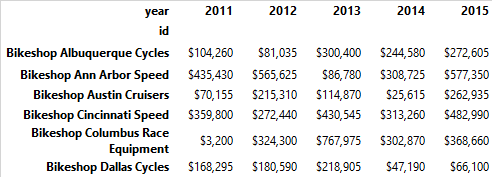

### Task

Use your `pandas` data wrangling skills to make a chart that summarizes annual sales by customer.

## Objectives:

1. Apply `pandas` functions to answer questions related to the course project.

2. Gain exposure to `jupyter` notebooks and labs

## Getting Started

### Check Working Directory

To read in the data, make sure your current working directory is set to the project directory. Two useful [jupyter magic commands](https://ipython.readthedocs.io/en/stable/interactive/magics.html) are:

1. `%pwd`: [Print working directory](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-cd) (you can detect your current directory)
2. `%cd`: You can [change directory](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-cd) to your working directory using relative paths or full paths. 


In [6]:
%pwd

'C:\\Users\\mdanc\\Documents\\Camtasia\\R Projects\\Courses\\DS4B_101_P_DEV_Python\\Challenge 1'

In [7]:
%cd ../

C:\Users\mdanc\Documents\Camtasia\R Projects\Courses\DS4B_101_P_DEV_Python


### Python Package Imports

In [23]:
# imports
import pandas as pd
import numpy as np
from mizani.formatters import dollar_format

from my_pandas_extensions.database import collect_data

### Import Data

Use `collect_data()` to fetch your data from the SQLite Database. Save your data as `df`.

In [9]:
# Use collect_data() to connect to the SQL database and fetch your data

df = collect_data()
df.head()

order_id  order_line order_date                     model  quantity  price  \
0         1           1 2011-01-07           Jekyll Carbon 2         1   6070   
1         1           2 2011-01-07          Trigger Carbon 2         1   5970   
2         2           1 2011-01-10       Beast of the East 1         1   2770   
3         2           2 2011-01-10          Trigger Carbon 2         1   5970   
4         3           1 2011-01-10  Supersix Evo Hi-Mod Team         1  10660   

   total_price              bikeshop_name category_1     category_2  \
0         6070   Ithaca Mountain Climbers   Mountain  Over Mountain   
1         5970   Ithaca Mountain Climbers   Mountain  Over Mountain   
2         2770          Kansas City 29ers   Mountain          Trail   
3         5970          Kansas City 29ers   Mountain  Over Mountain   
4        10660  Louisville Race Equipment       Road     Elite Road   

  frame_material         city state  
0         Carbon       Ithaca    NY  
1         Carbon       Ithaca    NY  
2       Aluminum  Kansas City    KS  
3         Carbon  Kansas City    KS  
4         Carbon   Louisville    KY

We'll use the following packages in this challenge. 

## Challenge

Perform the following tasks. 

### Task 1: Groupby, Resample, Summarize Your Raw Data

1. Start with `df`
2. Select the columns "bikeshop_name", "order_date", and "total_price"
3. Unite the text "Bikeshop " to the begining of bikeshop_name (e.g. 'Albuquerque Cycles' should become 'Bikeshop Albuquerque Cycles')
4. Rename the columns: 'id', 'date', and 'value'
5. Set the index to the 'date' column
6. Group by the 'id' column
7. Resample yearly (start of the year)
8. Aggregate using sum
9. Reset the index
11. Save the output as `summary_df_1`

In [25]:
# Code

summary_df_1 = df \
    [["bikeshop_name", "order_date", "total_price"]] \
    .assign(bikeshop_name = lambda x: "Bikeshop " + x['bikeshop_name']) \
    .set_axis(["id", "date", "value"], axis = 1) \
    .set_index('date') \
    .groupby('id') \
    .resample("YS") \
    .agg(np.sum) \
    .reset_index() 

summary_df_1

id       date   value
0    Bikeshop Albuquerque Cycles 2011-01-01  104260
1    Bikeshop Albuquerque Cycles 2012-01-01   81035
2    Bikeshop Albuquerque Cycles 2013-01-01  300400
3    Bikeshop Albuquerque Cycles 2014-01-01  244580
4    Bikeshop Albuquerque Cycles 2015-01-01  272605
..                           ...        ...     ...
145       Bikeshop Wichita Speed 2011-01-01  464750
146       Bikeshop Wichita Speed 2012-01-01  659825
147       Bikeshop Wichita Speed 2013-01-01  168705
148       Bikeshop Wichita Speed 2014-01-01  311585
149       Bikeshop Wichita Speed 2015-01-01  775520

[150 rows x 3 columns]

### Task 2: Pivot and Format Your Summary Table

In [27]:
summary_df_1 = pd.read_pickle("Challenge 1/data/summary_df_1.pkl")

1. Start with `summary_df_1`
2. Format the date as year using the dt accessor
2. Pivot the data using id as the id, date as the columns, and the summarized total_price as the values
4. Save the result as `summary_df_2`

In [50]:
# Code

summary_df_2 = summary_df_1 \
    .assign(date = lambda x: x['date'].dt.year) \
    .pivot(
        index   = 'id',
        columns ='date',
        values  = 'value'
    ) 

summary_df_2

date                                      2011     2012     2013     2014  \
id                                                                          
Bikeshop Albuquerque Cycles             104260    81035   300400   244580   
Bikeshop Ann Arbor Speed                435430   565625    86780   308725   
Bikeshop Austin Cruisers                 70155   215310   114870    25615   
Bikeshop Cincinnati Speed               359800   272440   430545   313260   
Bikeshop Columbus Race Equipment          3200   324300   767975   302870   
Bikeshop Dallas Cycles                  168295   180590   218905    47190   
Bikeshop Denver Bike Shop              1812640  1292015  1411365  1570640   
Bikeshop Detroit Cycles                 156255   162165   636535   408450   
Bikeshop Indianapolis Velocipedes       108760   133555   165015   336615   
Bikeshop Ithaca Mountain Climbers       679730   975770  1248635  1573385   
Bikeshop Kansas City 29ers             1406855  2169185  2838040  2035495   
Bikeshop Las Vegas Cycles               456320   365380   667095   606900   
Bikeshop Los Angeles Cycles              95335    62420   268795   174690   
Bikeshop Louisville Race Equipment      153290   391545   381410   393775   
Bikeshop Miami Race Equipment           310365   391825   888720   224625   
Bikeshop Minneapolis Bike Shop          426850   335055   269945   392645   
Bikeshop Nashville Cruisers              55080   189080   157030   234410   
Bikeshop New Orleans Velocipedes        387335   190470   764285   832240   
Bikeshop New York Cycles                279605   388100   366840    99140   
Bikeshop Oklahoma City Race Equipment   898490   436595   733870   579155   
Bikeshop Philadelphia Bike Shop          71085   201400   222750   188845   
Bikeshop Phoenix Bi-peds                640495   590505  1228720   782180   
Bikeshop Pittsburgh Mountain Machines   117035   144300   641335   591765   
Bikeshop Portland Bi-peds               355300   759420   315750   337215   
Bikeshop Providence Bi-peds             343725   231925   155200   374250   
Bikeshop San Antonio Bike Shop          143760    52595   218335    93725   
Bikeshop San Francisco Cruisers         319565   215810   520500   396425   
Bikeshop Seattle Race Equipment         100395    15630    61610   111820   
Bikeshop Tampa 29ers                    368725   169205   230815    31870   
Bikeshop Wichita Speed                  464750   659825   168705   311585   

date                                      2015  
id                                              
Bikeshop Albuquerque Cycles             272605  
Bikeshop Ann Arbor Speed                577350  
Bikeshop Austin Cruisers                262935  
Bikeshop Cincinnati Speed               482990  
Bikeshop Columbus Race Equipment        368660  
Bikeshop Dallas Cycles                   66100  
Bikeshop Denver Bike Shop              1611010  
Bikeshop Detroit Cycles                 274440  
Bikeshop Indianapolis Velocipedes       197060  
Bikeshop Ithaca Mountain Climbers      1821815  
Bikeshop Kansas City 29ers             3085880  
Bikeshop Las Vegas Cycles               977920  
Bikeshop Los Angeles Cycles             360810  
Bikeshop Louisville Race Equipment      614780  
Bikeshop Miami Race Equipment           241595  
Bikeshop Minneapolis Bike Shop          598725  
Bikeshop Nashville Cruisers             437325  
Bikeshop New Orleans Velocipedes        587495  
Bikeshop New York Cycles                240940  
Bikeshop Oklahoma City Race Equipment   801930  
Bikeshop Philadelphia Bike Shop          90470  
Bikeshop Phoenix Bi-peds                926635  
Bikeshop Pittsburgh Mountain Machines   260985  
Bikeshop Portland Bi-peds               204445  
Bikeshop Providence Bi-peds             520610  
Bikeshop San Antonio Bike Shop           65240  
Bikeshop San Francisco Cruisers         188170  
Bikeshop Seattle Race Equipment          86440  
Bikeshop Tampa 29ers                    170630  
Bikeshop Wichita

### Task 3: Make a USD Dollar Converter

1. Make a `usd = dollar_format()` that converts `usd([1000])` into `$1000`.
2. Prove that it works. Convert a list of `[100, 1000, 10000]` to a list of text-dollar values. 

In [52]:
# Code

usd = dollar_format(big_mark=",", digits=0)

In [51]:
usd([100, 1000, 1000])

['$100', '$1,000', '$1,000']

### Task 4: Apply styles to your table

In [56]:
summary_df_2 = pd.read_pickle("Challenge 1/data/summary_df_2.pkl")

1. Start with `summary_df_2`.
2. Use `df.style.highlight_max()` to highlight the maximum values
3. Apply the `usd()` function using `.format(lambda x: [YOUR CODE HERE])`. Hint: You'll need to work with casting to lists and extract elements from lists. 

In [54]:
# Code

summary_df_2 \
    .style.highlight_max() \
    .format(lambda x: usd([x])[0])

## Nice Work

This challenge tested your wrangling abilities. If you nailed it, you're doing awesome. If you didn't, guess what - You're still awesome too! Keep in mind you're learning, it takes time, and these challenges are meant to be *challenging*. 